<a href="https://colab.research.google.com/github/nicole-d-ai/modelo_regresion_lineal/blob/main/Aprendizaje_Autom%C3%A1tico(TP1)Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Modelo de Regresión Lineal  

📚 **Materia:** Aprendizaje Automático

**Nombre**: Nicole Ferreyra

**Profesora**: Ana Laura Diedrichs

🎯 **Objetivo:**  
Predecir la **resistencia a la compresión del hormigón (MPa)** a partir de las cantidades de sus componentes (cemento, agua, aditivos, agregados) y la edad de curado.  




# 1️⃣ Selección del Dataset


In [118]:
import pandas as pd
import requests, zipfile, io

#Guarda la url del Dataset
URL_ZIP = "https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip"


r = requests.get(URL_ZIP, timeout=30)
r.raise_for_status()

with zipfile.ZipFile(io.BytesIO(r.content)) as z:
    xls_name = next(n for n in z.namelist() if n.lower().endswith((".xls", ".xlsx")))
    with z.open(xls_name) as f:
        df = pd.read_excel(f)

df.head()



,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# 2️⃣ **Análisis Exploratorio (EDA)**  

-Describan las variables (media, distribución, outliers).

-Visualizen: Histogramas o boxplots para ver distribuciones.

-Gráficos de dispersión (scatterplots) entre features y target.

**Pregunta clave: ¿Qué relaciones lineales preliminares observan?**

 Información general

In [119]:
df.shape

(1030, 9)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [121]:
df.dtypes

,0
Cement (component 1)(kg in a m^3 mixture),float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture),float64
Fly Ash (component 3)(kg in a m^3 mixture),float64
Water (component 4)(kg in a m^3 mixture),float64
Superplasticizer (component 5)(kg in a m^3 mixture),float64
Coarse Aggregate (component 6)(kg in a m^3 mixture),float64
Fine Aggregate (component 7)(kg in a m^3 mixture),float64
Age (day),int64
"Concrete compressive strength(MPa, megapascals)",float64


In [122]:
df.columns = df.columns.str.strip()
list(df.columns)

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals)']

In [123]:
#Renombramos columnas
mapeo = {
    "Cement (component 1)(kg in a m^3 mixture)": "cemento_kg_m3",
    "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "escoria_horno_kg_m3",
    "Fly Ash (component 3)(kg in a m^3 mixture)": "cenizas_volantes_kg_m3",
    "Water  (component 4)(kg in a m^3 mixture)": "agua_kg_m3",
    "Superplasticizer (component 5)(kg in a m^3 mixture)": "superplastificante_kg_m3",
    "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "agregado_grueso_kg_m3",
    "Fine Aggregate (component 7)(kg in a m^3 mixture)": "agregado_fino_kg_m3",
    "Age (day)": "edad_dias",
    "Concrete compressive strength(MPa, megapascals)": "resistencia_mpa",
}

df = df.rename(columns=mapeo)
df.head()


,cemento_kg_m3,escoria_horno_kg_m3,cenizas_volantes_kg_m3,agua_kg_m3,superplastificante_kg_m3,agregado_grueso_kg_m3,agregado_fino_kg_m3,edad_dias,resistencia_mpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


**Estadísticas Descriptivas**

El dataset es completo (sin nulos), con variables en escalas diferentes, algunas muy dispersas y sesgadas (escoria, cenizas, superplastificante) y otras más estables (agua, agregados). Esto anticipa dos cosas importantes:

Vamos a necesitar normalización/estandarización para comparar variables.

Hay que revisar correlaciones para ver qué explica realmente la resistencia.

In [124]:
df.describe()

,cemento_kg_m3,escoria_horno_kg_m3,cenizas_volantes_kg_m3,agua_kg_m3,superplastificante_kg_m3,agregado_grueso_kg_m3,agregado_fino_kg_m3,edad_dias,resistencia_mpa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [125]:
df.duplicated().sum()

np.int64(25)

In [126]:
df = df.drop_duplicates()
print("Tamaño despues de eliminar los duplicados", df.shape)

Tamaño despues de eliminar los duplicados (1005, 9)


**Distribución del Target**


La distribución del target muestra que la mayoría de las mezclas de hormigón tienen resistencias entre 20 y 40 MPa, mientras que los valores muy altos o muy bajos son menos frecuentes. Esto indica que el modelo podrá ajustarse mejor en el rango central, aunque le costará más predecir los extremos por la menor cantidad de datos en esos valores.

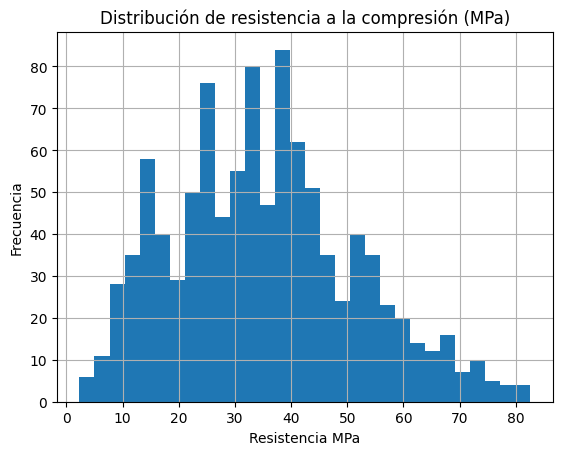

In [127]:
import matplotlib.pyplot as plt

df["resistencia_mpa"].hist(bins=30)
plt.title("Distribución de resistencia a la compresión (MPa)")
plt.xlabel("Resistencia MPa")
plt.ylabel("Frecuencia")
plt.show()


**Histogramas de features**



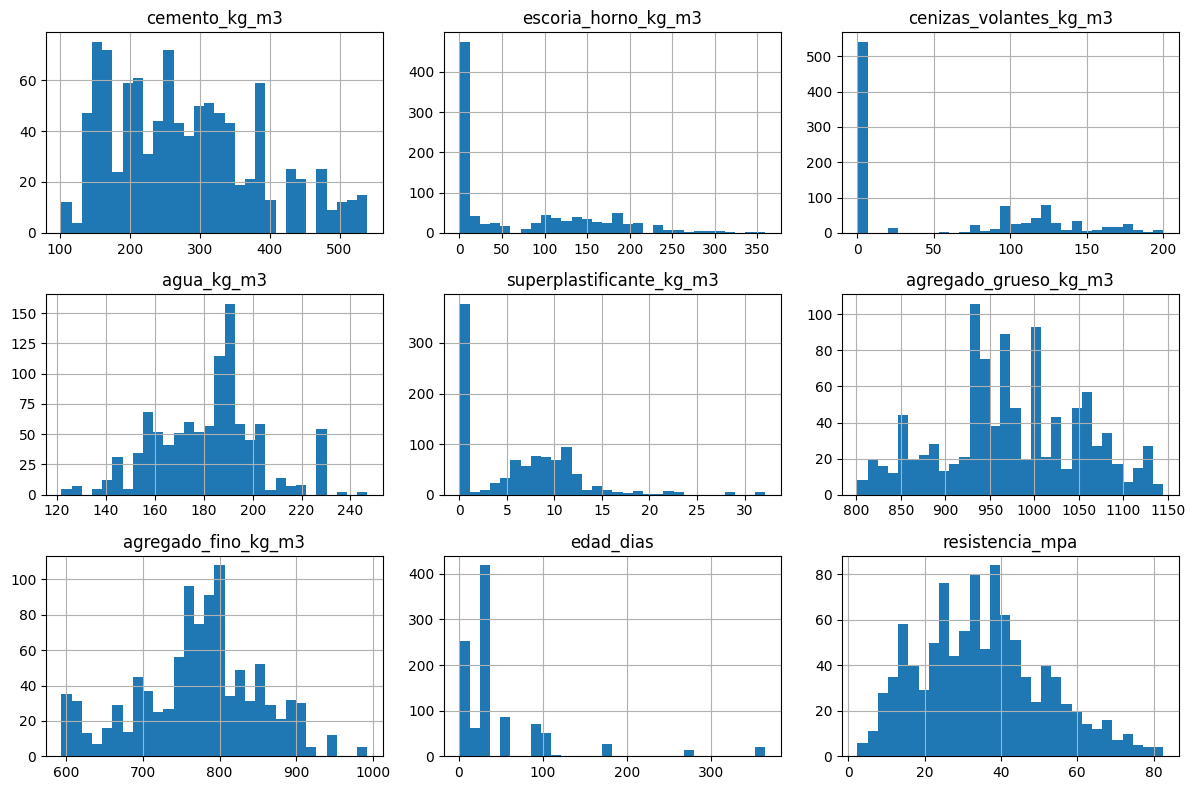

In [128]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()


✅ Conclusión general del histograma

Varias variables son sesgadas (escoria, ceniza, superplastificante) → muchas mezclas no las usan.

Otras son más estables y con rango estrecho (agua, agregados).

El target (resistencia) está concentrado en valores medios, lo que será más fácil de predecir que los extremos.

Todo esto justifica:

Normalizar, porque las escalas son muy distintas (cemento hasta 500 vs superplastificante hasta 30).

Usar regularización, porque algunas variables podrían no aportar mucho (escoria/ceniza con tantos ceros).

**Gráficos de Dispersión**


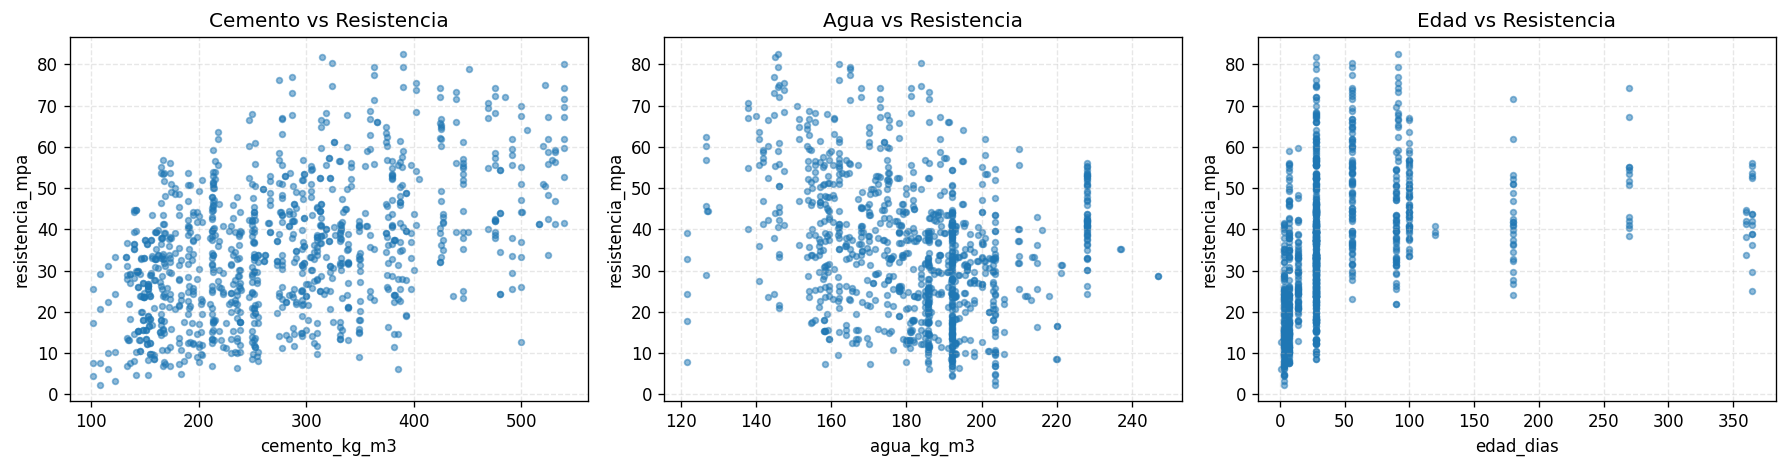

In [129]:
import matplotlib.pyplot as plt

target  = "resistencia_mpa"
cemento = "cemento_kg_m3"
agua    = "agua_kg_m3"
edad    = "edad_dias"

X_cols = [cemento, agua, edad]
tits   = ["Cemento vs Resistencia", "Agua vs Resistencia", "Edad vs Resistencia"]

fig, axes = plt.subplots(1, 3, figsize=(15,4), dpi=120)
for ax, xcol, tit in zip(axes, X_cols, tits):
    ax.scatter(df[xcol], df[target], alpha=0.5, s=12)
    ax.set_xlabel(xcol)
    ax.set_ylabel("resistencia_mpa")
    ax.set_title(tit)
    ax.grid(True, ls="--", alpha=0.3)

plt.tight_layout()
plt.show()


📊 Cemento vs Resistencia

* Tendencia positiva: a medida que aumenta la cantidad de cemento, la resistencia también tiende a subir.

💧 Agua vs Resistencia

* Tendencia negativa: más agua se asocia a menor resistencia.


⏳ Edad vs Resistencia

* Relación positiva pero no lineal: al principio la resistencia sube rápido con la edad de curado (primeros días). Luego se aplana: después de ~90–100 días, la resistencia ya no crece tanto.


# 3️⃣ **Preprocesamiento**
✔️ Limpieza: Manejen missing values (eliminar, imputar)  
✔️ Eliminación de duplicados.  
✔️ Outliers válidos (se mantuvieron).  
✔️ Estandarización con *StandardScaler*.  
✔️ División train/test (80/20).  

In [130]:
from sklearn.model_selection import train_test_split

y = df["resistencia_mpa"]
X = df.drop(columns=["resistencia_mpa"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((804, 8), (201, 8), (804,), (201,))

In [131]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Media (apox 0) y std (aprox 1) en Train: \n",
      np.round(X_train_scaled.mean(axis=0), 3),
      np.round(X_train_scaled.std(axis=0, ddof=0), 3))

Media (apox 0) y std (aprox 1) en Train: 
 [-0. -0. -0. -0.  0. -0.  0.  0.] [1. 1. 1. 1. 1. 1. 1. 1.]


Luego de dividir los datos en entrenamiento (80%) y prueba (20%), se aplicó estandarización mediante StandardScaler sobre las features. El resultado muestra que en el conjunto de entrenamiento todas las variables quedaron con media aproximadamente 0 y desvío estándar 1, lo que asegura que el modelo de regresión lineal no se vea afectado por las diferentes escalas originales de los datos.


* No se eliminaron outliers, ya que los valores extremos corresponden a condiciones reales de mezcla y no a errores de registro.

* Escoria y ceniza: muy sesgadas, pero conviene dejarlas porque en algunos casos pueden aportar.

* Los agregados son importantes en la mezcla real, pero en este dataset no aparecen con alta correlación con la resistencia. Probablemente porque siempre están en rangos similares y no varían tanto como el cemento, el agua o la edad, que son los que marcan más la diferencia.

# 4️⃣ **Regresión Lineal**  
🔹 Ajuste del modelo de **Regresión Lineal Múltiple** con `scikit-learn`.  
🔹 Obtención de coeficientes (pesos) → interpretación de importancia de variables.  
🔹 Evaluación en **train** y **test** con métricas:  
  - 📊 **R²** → proporción de variabilidad explicada.  
  - 🧮 **MSE** → error cuadrático medio.  
  - 📉 **RMSE** → error típico en MPa.  
  - 📏 **MAE** → error absoluto medio.  

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# 1) Entrenar
linea = LinearRegression()
linea.fit(X_train_scaled, y_train)

# 2) Predicciones
y_pred_train = linea.predict(X_train_scaled)
y_pred_test  = linea.predict(X_test_scaled)

# 3) Métricas
def regression_metricas(y_true, y_pred):
    r2  = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return pd.Series({"R2": r2,  #que tan bien predijo el modelo
                      "MSE": mse, #Error cuadratico medio
                      "RMSE": rmse, #Desvi estandar
                      "MAE": mae})  #error absoluto medio

metrics_train = regression_metricas(y_train, y_pred_train)
metrics_test  = regression_metricas(y_test,  y_pred_test)

print("Métricas - TRAIN:\n", metrics_train.round(4))
print("\nMétricas - TEST:\n",  metrics_test.round(4))


Métricas - TRAIN:
 R2        0.6081
MSE     103.8956
RMSE     10.1929
MAE       8.1558
dtype: float64

Métricas - TEST:
 R2        0.5748
MSE     111.5073
RMSE     10.5597
MAE       8.1114
dtype: float64


# 5️⃣ Importancia de Variables

Analicen los coeficientes del modelo:

* Valores absolutos altos → mayor impacto en el target.

* Signo: Relación positiva/negativa con el target.

* Comparen la magnitud de los coeficientes escalados (si usaron features en distintas unidades).

In [133]:
# Coeficientes (importancia de variables)
coefs = pd.Series(linea.coef_, index=X.columns)
coefs_abs = coefs.abs().sort_values(ascending=False)

print("\nPesos (coeficientes) ordenados por |valor|:")
display(pd.DataFrame({"coef_real": coefs.loc[coefs_abs.index],
                      "|coef|": coefs_abs}).round(4))



Pesos (coeficientes) ordenados por |valor|:


,coef_real,|coef|
cemento_kg_m3,11.7367,11.7367
escoria_horno_kg_m3,8.4671,8.4671
edad_dias,7.3756,7.3756
cenizas_volantes_kg_m3,5.3713,5.3713
agua_kg_m3,-3.7588,3.7588
superplastificante_kg_m3,1.4573,1.4573
agregado_fino_kg_m3,0.9451,0.9451
agregado_grueso_kg_m3,0.9089,0.9089


# 6️⃣ Resolución:

Las variables más importantes fueron:
* CEMENTO (impacto positivo, el más alto)
* ESCORIA (impacto positivo importante)
* EDAD (impacto positivo importante)
* CENIZAS (impacto positivo, aunque menor)
* AGUA (impacto negativo: más agua reduce la resistencia)

Coincide con lo visto en el análisis exploratorio: más cemento y más días aumentan la resistencia, mientras que un exceso de agua la reduce. Aunque la escoria y las cenizas no aparecen en todas las mezclas, cuando están presentes aportan de manera positiva.

* El modelo tuvo un rendimiento aceptable: R² ≈ 0.60, lo que significa que explica el 60% de la variabilidad de la resistencia.  
* El MAE ≈ 8 MPa indica que, en promedio, el modelo se equivoca 8 unidades de resistencia.  
* El RMSE ≈ 10.5 MPa muestra que el error típico es de alrededor del 30% respecto a la resistencia media (~35 MPa).  
* El modelo es estable (los errores de train y test fueron muy similares), aunque no perfecto. Esto probablemente se debe a que la relación entre variables y resistencia no es completamente lineal y a que existe variabilidad natural en las mezclas.